# Академия: Практикум

## Химическая эволюция Галактики и радиусы рождения звёзд

В этом практикуме мы строим полностью воспроизводимый, основанный на наблюдательных данных пайплайн для изучения химической структуры и эволюции диска Галактики.

Используя крупные современные обзоры (`APOGEE` и `Gaia`), мы показываем, как галактическая археология проходит путь от сырых каталогов наблюдений к физически осмысленным выводам. Практикум организован в две взаимодополняющие части.

В Части I мы сосредотачиваемся на современной структуре диска Млечного Пути. Выполнив кросс-идентификацию металличностей `APOGEE` с астрометрией `Gaia`, мы формируем чистый наблюдательный датасет и демонстрируем наличие чёткого радиального градиента металличности в диске Галактики. Этот градиент возникает непосредственно из данных, без каких-либо модельных предположений, подчёркивая важность статистического биннинга и аккуратной визуализации при работе с большими обзорами.

В Части II мы вводим возраста звёзд, полученные из астеросейсмически откалиброванных выборок `APOGEE` (Boulet et al. 2024). Учет возрастов позволяет выйти за рамки статических распределений и исследовать временное измерение химической эволюции Галактики. Мы показываем, что, несмотря на сильный разброс в соотношении «возраст–металличность», при статистическом анализе проявляются систематические тенденции, указывающие на рост диска «изнутри-наружу» и роль радиальной миграции.

На протяжении всего практикума особое внимание уделяется методологии:
- все промежуточные наборы данных сохраняются в формате CSV;
- каждый этап анализа является воспроизводимым и модульным;
- каждый рисунок может быть перестроен независимо от внешних сервисов.

Практикум 2 закладывает наблюдательную основу, необходимую для связи структуры Галактики с физическими моделями формирования и эволюции диска, подготавливая почву для последующей реконструкции радиусов рождения звёзд и количественной проверки моделей галактической химической эволюции.

### Мотивация

В Практикуме 1 мы заложили чистую наблюдательную основу, охарактеризовав выборки звёзд и восстановив их возраста для звёзд-хостов планет.

В этом практикуме мы делаем следующий шаг и помещаем эти звёзды в их галактический контекст.

Центральная цель Практикума 2 — связать возраст и металличность звёзд с крупномасштабной химической эволюцией диска Млечного Пути и использовать эту связь для восстановления галактоцентрических радиусов рождения звёзд.

Для этого мы действуем в два этапа:
1.	Используем крупный однородный спектроскопический обзор (APOGEE) для извлечения эмпирических химо-возрастных тенденций галактического диска.	
2.	Используем эти тенденции как физически мотивированный прокси-описатель временной эволюции металличности межзвёздной среды (ISM).

Такой подход позволяет перевести наблюдаемые свойства звёзд
(возраст, [Fe/H]) в правдоподобную среду их галактического формирования.


### Настройка ноутбука: пути и экспорт рисунков

#### Назначение этой ячейки

Эта ячейка выполняет базовую инициализацию ноутбука и определяет небольшую вспомогательную утилиту, которая будет использоваться на протяжении всего практикума.

Её роль носит исключительно инфраструктурный характер: на этом этапе ещё не выполняются научные вычисления или визуализации.




В частности, эта ячейка:
1.	Определяет корневую директорию проекта
Ноутбук может запускаться из разных подкаталогов.

Чтобы все пути были устойчивыми и воспроизводимыми, мы автоматически поднимаемся вверх по дереву каталогов до тех пор, пока не найдём папку topics, которая служит маркером корня проекта.

2.	Задаёт рабочую директорию для данного практикума
Все результаты, относящиеся к этому практикуму (рисунки, анимации, наборы данных), сохраняются в каталоге
`topics/TOP_0001_exoplanet_birth_radius`.

3.	Создаёт выделенную директорию для экспортируемых рисунков
Все рисунки, сгенерированные в этом ноутбуке, сохраняются в языко-зависимую папку
(`figures/ru`), что упрощает последующую компоновку PDF-документов или повторное использование результатов в других продуктах.

4.	Определяет вспомогательную функцию `save_fig()`, которая стандартизирует процесс сохранения рисунков:
- единный формат файлов (`PNG`),
- единное разрешение (`DPI`),
- единный режим компоновки (`bbox_inches="tight"`),
- и одно предсказуемое место сохранения.

Использование такой вспомогательной функции избавляет от повторяющегося шаблонного кода и гарантирует, что все рисунки в ноутбуке экспортируются единообразно.

Такая настройка позволяет в последующих ячейках сосредоточиться на научных идеях и интерпретации результатов, не отвлекаясь на работу с путями и управлением файлами.

In [1]:
# =========================================================
# Cell 0 — Universal bootstrap (globals, paths, theme, i18n)
# Works for: ACAP_* and ANIM_*
# =========================================================

from __future__ import annotations

from pathlib import Path
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lulab.io.paths import (
    get_topic_root,
    figures_dir,
    data_raw_dir,
    data_processed_dir,
    animations_dir,
)
from lulab.io.save_figure import save_fig
import lulab.io.theme as th

# -----------------------------
# External services (Vizier)
# -----------------------------
from astroquery.vizier import Vizier

# No row limit by default
Vizier.ROW_LIMIT = -1

from tqdm import tqdm

# -----------------------------
# Global notebook constants
# -----------------------------
TOPIC: str = "TOP_0001_exoplanet_birth_radius"
NOTEBOOK: str = "ACAP_002"   # e.g. "ACAP_001", "ANIM_001"
LANG: str = "ru"             # "en" / "ru"
THEME: str = "light"          # "light" / "dark"

# -----------------------------
# Animation export settings (safe to keep for ACAP too)
# -----------------------------
ANIM_FORMAT = "mp4"       # "gif" / "mp4"
FPS = 24
DPI = 200

MP4_CODEC = "libx264"
MP4_BITRATE = 1800

GIF_WRITER = "pillow"
GIF_LOOP = 0

# --- physical limits (keep consistent) ---
AGE_MIN_GYR = 0.1
AGE_MAX_GYR = 13.5
R_SUN = 8.0  # kpc

# -----------------------------
# Common paths
# -----------------------------
TOPIC_ROOT: Path = get_topic_root(TOPIC)
FIG_DIR: Path = figures_dir(TOPIC, lang=LANG, create=True)

DATA_RAW_DIR: Path = data_raw_dir(TOPIC, create=False)
DATA_PROCESSED_DIR: Path = data_processed_dir(TOPIC, create=True)

ANIM_DIR: Path = animations_dir(TOPIC, create=True)

# --- legacy aliases (do NOT remove, used in older cells) ---
RAW  = DATA_RAW_DIR
PROC = DATA_PROCESSED_DIR

# -----------------------------
# Theme
# -----------------------------
# Use a single consistent entry point everywhere
th.apply_theme(THEME)

# -----------------------------
# Save helpers
# -----------------------------
def save_fig0(fig_id: str, *, fig):
    """
    Save figure with notebook-scoped ID to avoid collisions.

    Example:
        save_fig0("Figure_3", fig=fig)
    -> build artifact ID:
        ANIM_001_Figure_3
    """
    full_id = f"{NOTEBOOK}_{fig_id}"
    return save_fig(full_id, fig=fig, topic=TOPIC, lang=LANG)

def anim_outpath(anim_id: str, ext: str | None = None) -> Path:
    """
    Standard output path for animations.
    Example:
        out = anim_outpath("Orbit_1")  -> ANIM_DIR/ANIM_001_Orbit_1.mp4
        out = anim_outpath("Orbit_1", ext="gif")
    """
    if ext is None:
        ext = ANIM_FORMAT
    return ANIM_DIR / f"{NOTEBOOK}_{anim_id}.{ext}"

# -----------------------------
# i18n bootstrap (force reload to avoid stale imports)
# -----------------------------
import lulab.i18n.plot_text as pt
importlib.reload(pt)

pt.set_lang(LANG)
if hasattr(pt, "set_notebook"):
    pt.set_notebook(NOTEBOOK)

pt.load_topic_i18n(TOPIC_ROOT, strict=True)

# convenience aliases (stable)
L = pt.L
T = pt.T

# -----------------------------
# Quick sanity printout
# -----------------------------
print("\n--- BOOTSTRAP ---")
print("TOPIC      :", TOPIC)
print("NOTEBOOK   :", NOTEBOOK)
print("LANG       :", LANG)
print("THEME      :", THEME)
print("TOPIC_ROOT :", TOPIC_ROOT)
print("FIG_DIR    :", FIG_DIR)
print("DATA_RAW   :", DATA_RAW_DIR)
print("DATA_PROC  :", DATA_PROCESSED_DIR)
print("ANIM_DIR   :", ANIM_DIR)
print("ANIM_FORMAT:", ANIM_FORMAT)
print("FPS / DPI  :", FPS, "/", DPI)


--- BOOTSTRAP ---
TOPIC      : TOP_0001_exoplanet_birth_radius
NOTEBOOK   : ACAP_002
LANG       : ru
THEME      : light
TOPIC_ROOT : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius
FIG_DIR    : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/ru
DATA_RAW   : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw
DATA_PROC  : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed
ANIM_DIR   : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/animations
ANIM_FORMAT: mp4
FPS / DPI  : 24 / 200


## Часть I. Химическая структура Галактики по данным APOGEE × Gaia

### 1.1. Цель этой части

В первой части Практикума 2 мы стремимся связать звёздную химию, возраста и галактическую структуру, используя крупные спектроскопические и астрометрические обзоры.

В частности, мы хотим ответить на три тесно связанных вопроса:
1. Как изменяется металличность звёзд [Fe/H] с возрастом?
2. Как меняется функция распределения металличности (MDF) с галактоцентрическим радиусом?
3. Каков современный радиальный градиент металличности диска Млечного Пути?

Эти вопросы образуют наблюдательную основу моделей галактической химической эволюции (GCE) и мотивируют последующие части практикума.


### 1.2. Источники данных

Мы объединяем два (и один дополнительный) взаимодополняющих набора данных:

1. **Спектроскопия звёзд APOGEE**
- Обеспечивает точные химические абундансы, в частности [Fe/H]
- Большая, однородная выборка звёзд диска Млечного Пути

2. **Астрометрия Gaia DR3**
- Предоставляет параллаксы и координаты на небе
- Позволяет вычислять расстояния и галактоцентрические радиусы

3. **Возрастные оценки APOGEE из Boulet et al. (2024)**
- Астеросейсмически откалиброванные возраста звёзд
- Используются только для анализа связи возраст–металличность
- Это позволяет избежать модельно-зависимых оценок возрастов в данном практикуме


### 1.3. Промежуточные продукты данных

Чтобы рабочий процесс был прозрачным и воспроизводимым, все промежуточные результаты сохраняются в виде явных CSV-файлов в каталоге обработанных данных данного топика.

Обработанные файлы, создаваемые в этой части:

| Имя файла                | Содержимое                                                  | Назначение                              |
|--------------------------|--------------------------------------------------------------|-----------------------------------------|
| `apogee_xmatch_raw.csv`  | Сырой кросс-матч APOGEE × Gaia                              | Отладка / происхождение данных          |
| `apogee_ready.csv`       | Очищенная таблица APOGEE × Gaia (`ra`, `dec`, `feh`, `plx_mas`, `R_gal`, …) | MDF и радиальные градиенты              |
| `boulet_apogee_ages.csv` | Звёзды APOGEE с откалиброванными возрастами и `[Fe/H]`       | Связь возраст–металличность             |

Эти файлы отделяют подготовку данных от визуализации, позволяя ячейкам с графиками быть лёгкими и быстрыми.


### 1.4. Пайплайн предварительной обработки данных

Концептуально поток данных в этой части практикума выглядит следующим образом:

![Пайплайн данных для ACAP 002](../assets/ACAP_002_EN_Data_Pipeline.png)

В результате формируются две параллельные, но взаимодополняющие таблицы:
- одна оптимизирована для анализа галактической структуры (`apogee_ready.csv`)
- другая оптимизирована для анализа звёздных возрастов (`boulet_apogee_ages.csv`)

Они намеренно не объединяются, чтобы все допущения оставались явными.


### 1.5. Что мы делаем с данными

Используя обработанные таблицы, мы строим фигуру из трёх панелей, каждая из которых отвечает на конкретный физический вопрос.

**(a) Возраст vs [Fe/H]**
- Входные данные: `boulet_apogee_ages.csv`
- Диаграмма рассеяния возраста звёзд и металличности
- Биннинг по возрасту с медианой подчёркивает общий тренд
- Отражает историю химического обогащения диска

**(b) Функция распределения металличности (MDF)**
- Входные данные: `apogee_ready.csv`
- Звёзды разбиваются на интервалы галактоцентрического радиуса (например, 6–8, 8–10, 10–12 кпк)
- MDF отображаются горизонтально для прямого сравнения
- Демонстрирует радиальную зависимость химического обогащения

**(c) R vs [Fe/H]**
- Входные данные: `apogee_ready.csv`
- Диаграмма рассеяния галактоцентрического радиуса и металличности
- Линейная аппроксимация даёт глобальный радиальный градиент металличности
- Вертикальная линия отмечает приблизительный радиус рождения Солнца


### 1.6. Итоговая визуализация

Все три панели объединяются в единую фигуру в «публикационном» стиле:
- Общая ось [Fe/H] для физической согласованности
- Минимальные, но информативные аннотации
- Оформление, характерное для работ по галактической химической эволюции

Фигура сохраняется с использованием стандартизированного пайплайна проекта, что обеспечивает:
- единое именование файлов (`ACAP_002_…`)
- учёт языка в выходных каталогах
- воспроизводимость между ноутбуками


### 1.7. Почему такая структура важна

Такой дизайн обеспечивает соблюдение нескольких важных научных принципов:
- Чёткое разделение этапов получения данных, обработки и визуализации
- Явные допущения, особенно в отношении звёздных возрастов
- Возможность повторного использования обработанных данных в последующих упражнениях и анимациях
- Прямую сопоставимость с опубликованными исследованиями по галактической химической эволюции

В следующих частях практикума эти наблюдательные результаты будут интерпретированы в контексте радиальной миграции и моделей химической эволюции Галактики.

### 1.8. Обработка данных `APOGEE` 

In [2]:
# === CELL: A2_APOGEE_PREP_VIZIER_XMATCH ===
import numpy as np
import pandas as pd
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch
from astropy import units as u
from io import StringIO

# =========================================================
# APOGEE × Gaia (DR3) prep  — RUN ONCE
# Produces:
#   1) apogee_xmatch_raw.csv   (full XMatch output for debugging)
#   2) apogee_ready.csv        (minimal clean table for all plots)
#
# Requires from bootstrap:
#   DATA_PROCESSED_DIR (Path)
# =========================================================

# -----------------------------
# Settings (tune)
# -----------------------------
VIZIER_ROW_LIMIT = 300_000
N_SAMPLE = 120_000
XMATCH_RADIUS = 1.0 * u.arcsec   # Quantity
RANDOM_SEED = 1

# Prefer APOGEE DR17 if available; keep your fallbacks too.
# (If the first doesn't work in your env, it will fall through.)
CANDIDATE_CATS = [
    "III/286/catalog",    # APOGEE DR17 (as you already use)
    "III/284/allstars",   # (fallback)
    "III/285/catalog",    # (fallback)
]

# Output filenames (single source of truth)
OUT_RAW   = "apogee_xmatch_raw.csv"
OUT_READY = "apogee_ready.csv"

# Parallax cuts (keep loose + consistent)
PLX_MIN_MAS = 0.1
PLX_MAX_MAS = 10.0

# -----------------------------
# 0) Helpers
# -----------------------------
def _pick_feh_col(cols):
    feh_candidates = ["[Fe/H]", "__Fe_H_", "Fe_H", "FE_H", "feh", "FEH"]
    for c in feh_candidates:
        if c in cols:
            return c
    feh_like = [c for c in cols if ("Fe/H" in c) or ("FE_H" in c) or ("Fe_H" in c)]
    return feh_like[0] if feh_like else None

def _pick_col(xm_cols, preferred, fallbacks_lower):
    # exact preferred first
    for c in preferred:
        if c in xm_cols:
            return c
    # then lower-case matching
    low = {c.lower(): c for c in xm_cols}
    for k in fallbacks_lower:
        if k in low:
            return low[k]
    return None

# -----------------------------
# 1) Load APOGEE-like table from VizieR
# -----------------------------
Vizier.ROW_LIMIT = VIZIER_ROW_LIMIT

ap_raw = None
used_cat = None
used_feh_col = None
last_err = None

for cat in CANDIDATE_CATS:
    try:
        print(f"Fetching APOGEE sample from VizieR: {cat} (ROW_LIMIT={VIZIER_ROW_LIMIT}) ...")
        tabs = Vizier.get_catalogs(cat)
        if len(tabs) == 0:
            continue

        t = tabs[0].to_pandas()

        if not {"RAJ2000", "DEJ2000"}.issubset(t.columns):
            print(f"  - skip {cat}: missing RAJ2000/DEJ2000")
            continue

        feh_col = _pick_feh_col(t.columns)
        if feh_col is None:
            print(f"  - skip {cat}: no [Fe/H]-like column found")
            continue

        ap_raw = t
        used_cat = cat
        used_feh_col = feh_col
        break

    except Exception as e:
        last_err = e
        print(f"  - error in {cat}: {e}")

if ap_raw is None:
    raise RuntimeError(
        f"Failed to load a usable APOGEE table from VizieR. Last error: {last_err}"
    )

print(f"\nUsing VizieR APOGEE catalog: {used_cat}")
print("Raw rows:", len(ap_raw))
print("Detected [Fe/H] column:", used_feh_col)

ap = (
    ap_raw.rename(columns={"RAJ2000": "ra", "DEJ2000": "dec", used_feh_col: "feh"})[
        ["ra", "dec", "feh"]
    ].copy()
)

# numeric coercion + clean
for col in ["ra", "dec", "feh"]:
    ap[col] = pd.to_numeric(ap[col], errors="coerce")

ap = ap.dropna(subset=["ra", "dec", "feh"]).copy()
print("Clean APOGEE rows:", len(ap))

if len(ap) > N_SAMPLE:
    ap = ap.sample(N_SAMPLE, random_state=RANDOM_SEED).reset_index(drop=True)
    print("Sampled APOGEE rows for xMatch:", len(ap))

# -----------------------------
# 2) CDS XMatch: upload APOGEE as CSV
# -----------------------------
print(
    f"Running CDS XMatch: APOGEE(upload) × I/355/gaiadr3 "
    f"(r={XMATCH_RADIUS.to_value(u.arcsec):.2f}\") ..."
)

csv_buf = StringIO()
ap.to_csv(csv_buf, index=False)
csv_buf.seek(0)

xm = XMatch.query(
    cat1=csv_buf,                 # file-like with .read()
    cat2="vizier:I/355/gaiadr3",
    max_distance=XMATCH_RADIUS,
    colRA1="ra",
    colDec1="dec",
).to_pandas()

print("XMatch rows returned:", len(xm))
print("XMatch columns (head):", list(xm.columns)[:25], "...")

# -----------------------------
# 3) Normalize to minimal schema used by plotting cells
# -----------------------------
# Gaia source id column often "Source"
src_col = _pick_col(
    xm.columns,
    preferred=["Source", "source_id", "gaia_id"],
    fallbacks_lower=["source", "source_id", "gaia_id", "dr3_source_id"],
)
# Parallax column often "Plx"
plx_col = _pick_col(
    xm.columns,
    preferred=["Plx", "parallax"],
    fallbacks_lower=["plx", "parallax"],
)

if src_col is None:
    raise RuntimeError(f"Could not find Gaia source id column. Columns: {list(xm.columns)}")
if plx_col is None:
    raise RuntimeError(f"Could not find Gaia parallax column. Columns: {list(xm.columns)}")
if "feh" not in xm.columns:
    raise RuntimeError("XMatch output is missing 'feh' column (should be carried from upload).")

apogee = xm.rename(columns={src_col: "gaia_id", plx_col: "plx_mas"})[
    ["ra", "dec", "gaia_id", "feh", "plx_mas"]
].copy()

# numeric coercion
apogee["gaia_id"] = pd.to_numeric(apogee["gaia_id"], errors="coerce")
apogee["plx_mas"] = pd.to_numeric(apogee["plx_mas"], errors="coerce")
apogee["feh"] = pd.to_numeric(apogee["feh"], errors="coerce")
apogee["ra"] = pd.to_numeric(apogee["ra"], errors="coerce")
apogee["dec"] = pd.to_numeric(apogee["dec"], errors="coerce")

apogee = apogee.dropna(subset=["gaia_id", "plx_mas", "feh", "ra", "dec"]).copy()

# gaia_id as int64
apogee["gaia_id"] = apogee["gaia_id"].astype(np.int64)

# basic parallax cuts
apogee = apogee[
    (apogee["plx_mas"] > 0) &
    (apogee["plx_mas"] >= PLX_MIN_MAS) &
    (apogee["plx_mas"] <= PLX_MAX_MAS)
].copy()

print("\nFinal `apogee` DataFrame ready.")
print("Rows:", len(apogee))
print("Columns:", list(apogee.columns))
display(apogee.head())

# -----------------------------
# 4) Save outputs for downstream cells
# -----------------------------
out_dir = DATA_PROCESSED_DIR
out_dir.mkdir(parents=True, exist_ok=True)

out_raw = out_dir / OUT_RAW
out_ready = out_dir / OUT_READY

# Save full xmatch table (debug/reference)
xm.to_csv(out_raw, index=False)

# Save the clean minimal table (used by ALL plots below)
apogee.to_csv(out_ready, index=False)

print("\nSaved:")
print(" -", out_raw)
print(" -", out_ready)
print("\nNOTE: Downstream plotting cells should now `pd.read_csv(out_ready)` and NOT rebuild XMatch.")

Could not import regions, which is required for some of the functionalities of this module.
Fetching APOGEE sample from VizieR: III/286/catalog (ROW_LIMIT=300000) ...

Using VizieR APOGEE catalog: III/286/catalog
Raw rows: 300000
Detected [Fe/H] column: [Fe/H]
Clean APOGEE rows: 259564
Sampled APOGEE rows for xMatch: 120000
Running CDS XMatch: APOGEE(upload) × I/355/gaiadr3 (r=1.00") ...
XMatch rows returned: 116320
XMatch columns (head): ['angDist', 'ra', 'dec', 'feh', 'DR3Name', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'SolID', 'Source', 'RandomI', 'e_RAdeg', 'e_DEdeg', 'Plx', 'e_Plx', 'RPlx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor'] ...

Final `apogee` DataFrame ready.
Rows: 103606
Columns: ['ra', 'dec', 'gaia_id', 'feh', 'plx_mas']


,ra,dec,gaia_id,feh,plx_mas
0,102.808669,-3.926176,3102392733471646592,-0.2503,0.5660
1,55.832592,19.945875,63125990504192768,-0.5453,0.3404
2,29.709129,48.520287,356748062441880960,-0.2968,0.4402
3,60.891225,11.380289,3304564918630090624,-0.0061,6.3857
4,96.339634,12.644308,3331490893244407296,-0.5358,0.1978



Saved:
 - /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/apogee_xmatch_raw.csv
 - /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/apogee_ready.csv

NOTE: Downstream plotting cells should now `pd.read_csv(out_ready)` and NOT rebuild XMatch.


### 1.9 Добавляем расстояние и R_gal в данные `APOGEE`

In [3]:
# =========================================================
# [ACAP_002|DATA_ISM] Build `m` (APOGEE×Gaia + dist_kpc + R_gal)
#
# Input:
#   - apogee_ready.csv  (produced by your APOGEE prep cell)
#
# Output:
#   - m DataFrame with columns: ra, dec, gaia_id, feh, plx_mas, dist_kpc, R_gal
#   - saved CSV: apogee_gaia_fehr_R.csv   (for plots + animation notebooks)
# =========================================================

import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

apogee_ready_path = DATA_PROCESSED_DIR / "apogee_ready.csv"
out_path = DATA_PROCESSED_DIR / "apogee_gaia_fehr_R.csv"

apogee = pd.read_csv(apogee_ready_path)

need = {"ra", "dec", "gaia_id", "feh", "plx_mas"}
missing = need - set(apogee.columns)
if missing:
    raise KeyError(f"apogee_ready.csv missing columns: {missing}. Has: {list(apogee.columns)}")

m = apogee.copy()

# numeric safety
for c in ["ra", "dec", "feh", "plx_mas"]:
    m[c] = pd.to_numeric(m[c], errors="coerce")
m = m.dropna(subset=["ra", "dec", "feh", "plx_mas"]).copy()

# distance in kpc: parallax in mas => distance(pc) = 1000/plx_mas => kpc = 1/plx_mas
# (you already applied loose plx cuts in prep cell; keep a final guard)
m = m[(m["plx_mas"] > 0)].copy()
m["dist_kpc"] = 1.0 / m["plx_mas"]

# compute Galactocentric radius in the disk plane (R_gal)
# Geometry:
#   d_xy = d * cos(b)
#   R = sqrt(Rsun^2 + d_xy^2 - 2*Rsun*d_xy*cos(l))
coords = SkyCoord(
    ra=m["ra"].to_numpy() * u.deg,
    dec=m["dec"].to_numpy() * u.deg,
    distance=m["dist_kpc"].to_numpy() * u.kpc,
    frame="icrs",
)
gal = coords.galactic
l = gal.l.to_value(u.rad)
b = gal.b.to_value(u.rad)
d = m["dist_kpc"].to_numpy(dtype=float)
d_xy = d * np.cos(b)

Rsun = float(R_SUN)  # from bootstrap, kpc
m["R_gal"] = np.sqrt(np.maximum(0.0, Rsun**2 + d_xy**2 - 2.0 * Rsun * d_xy * np.cos(l)))

# final cleanup (optional but useful)
m = m.replace([np.inf, -np.inf], np.nan).dropna(subset=["dist_kpc", "R_gal", "feh"]).copy()

# save (this is what animation notebooks should use too)
m.to_csv(out_path, index=False)

print("m ready + saved.")
print("Path :", out_path)
print("Rows :", len(m))
print("Cols :", list(m.columns))
display(m.head())

m ready + saved.
Path : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/apogee_gaia_fehr_R.csv
Rows : 103606
Cols : ['ra', 'dec', 'gaia_id', 'feh', 'plx_mas', 'dist_kpc', 'R_gal']


,ra,dec,gaia_id,feh,plx_mas,dist_kpc,R_gal
0,102.808669,-3.926176,3102392733471646592,-0.2503,0.5660,1.766784,9.479378
1,55.832592,19.945875,63125990504192768,-0.5453,0.3404,2.937720,10.577425
2,29.709129,48.520287,356748062441880960,-0.2968,0.4402,2.271695,9.677240
3,60.891225,11.380289,3304564918630090624,-0.0061,6.3857,0.156600,8.136204
4,96.339634,12.644308,3331490893244407296,-0.5358,0.1978,5.055612,12.890503


### 1.10. Устанавливаем связи возраст-металличность с массивом данных Boulet

In [4]:
# =========================================================
# DATA_AGE — Boulet+2024 ages (APOGEE DR17, VizieR) -> df_age + CSV cache
# =========================================================

import numpy as np
import pandas as pd
from astroquery.vizier import Vizier

OUT_AGE = DATA_PROCESSED_DIR / "boulet_apogee_ages.csv"

def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

if OUT_AGE.exists():
    df_age = pd.read_csv(OUT_AGE)
    print("Loaded cached:", OUT_AGE, "| rows:", len(df_age))
else:
    Vizier.ROW_LIMIT = -1
    cat = "J/A+A/685/A66"   # Boulet 2024 ages for APOGEE DR17
    t = Vizier.get_catalogs(cat)[0].to_pandas()
    print("Fetched:", cat, "| rows:", len(t))
    print("Columns(head):", list(t.columns)[:40])

    # --- try to find Gaia source id
    gaia_col = pick_col(t, ["Source", "source_id", "GaiaDR3", "GaiaEDR3", "Gaia", "GAIAEDR3", "GAIADR3"])

    # --- age column candidates (depends on catalog schema)
    age_gyr_col = pick_col(t, ["Age", "age", "AgeGyr", "age_gyr", "AGE_GYR", "t_gyr"])
    logage_col  = pick_col(t, ["logAge", "log_age", "logt", "logAge_yr", "logAgeYr"])

    # --- metallicity candidates
    feh_col = pick_col(t, ["[Fe/H]", "FeH", "feh", "__Fe_H_", "FE_H", "Fe_H"])

    if feh_col is None:
        raise RuntimeError("Cannot find [Fe/H] column in Boulet table. Check columns print above.")

    if (age_gyr_col is None) and (logage_col is None):
        raise RuntimeError("Cannot find age column (Age in Gyr or logAge). Check columns print above.")

    df_age = pd.DataFrame()
    if gaia_col is not None:
        df_age["gaia_id"] = pd.to_numeric(t[gaia_col], errors="coerce")

    df_age["feh"] = pd.to_numeric(t[feh_col], errors="coerce")

    if age_gyr_col is not None:
        df_age["age"] = pd.to_numeric(t[age_gyr_col], errors="coerce")
    else:
        # assume log10(age/yr)
        logage = pd.to_numeric(t[logage_col], errors="coerce")
        df_age["age"] = (10 ** logage) / 1e9

    # basic cleanup
    keep = ["age", "feh"] + (["gaia_id"] if "gaia_id" in df_age.columns else [])
    df_age = df_age[keep].dropna().copy()

    OUT_AGE.parent.mkdir(parents=True, exist_ok=True)
    df_age.to_csv(OUT_AGE, index=False)
    print("Saved:", OUT_AGE, "| rows:", len(df_age))

df_age.head()

Loaded cached: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/boulet_apogee_ages.csv | rows: 125445


,age,feh,gaia_id
0,5.77,-0.54,4342806982510019456
1,8.28,0.15,1158019050967480064
2,4.70,-0.24,1159422749358899072
3,8.60,-0.91,4131550666634133888
4,6.11,-0.04,4110973989419352704


### 1.11. График химико-возрастной структуры диска Галактики

Фигура ниже суммирует ключевые химико-возрастные свойства выборки `APOGEE`.

Три панели показывают взаимодополняющие проекции одной и той же
звёздной популяции и вместе отражают основные эмпирические тренды,
необходимые для дальнейшего анализа.

df_age rows: 125445
ISM rows   : 103606


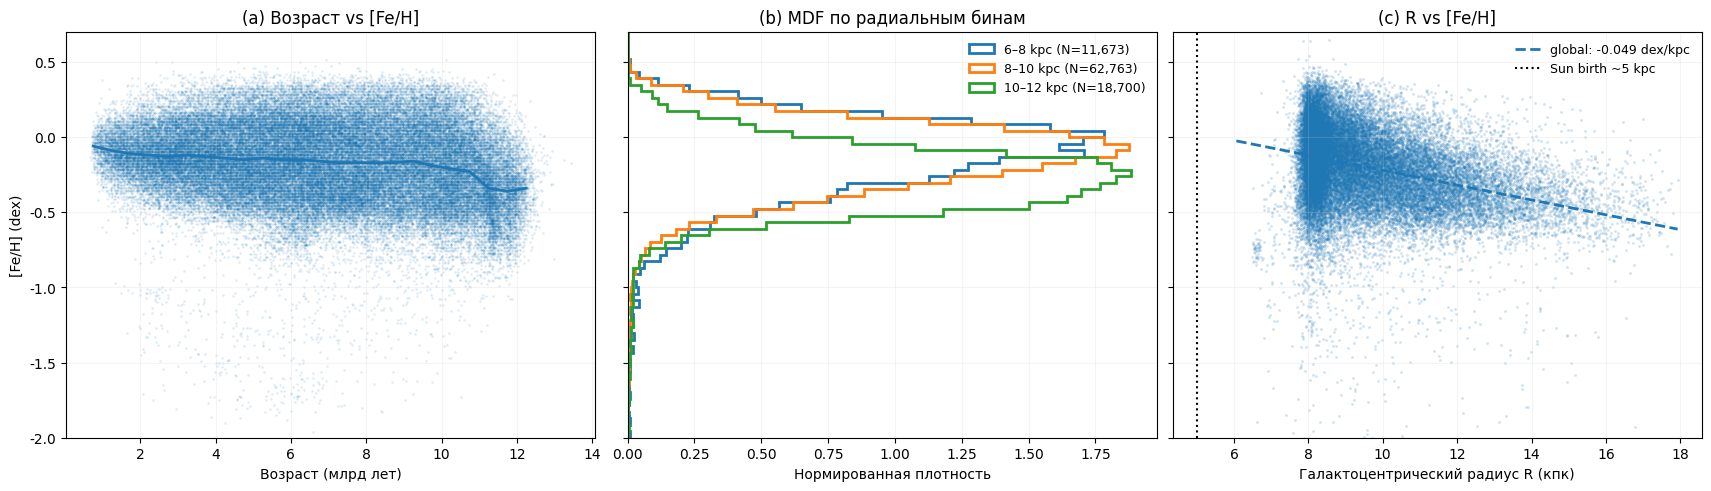

Global gradient d[Fe/H]/dR = -0.049 dex/kpc
Saved figure: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/ru/ACAP_002_Figure_1.png


PosixPath('/Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/ru/ACAP_002_Figure_1.png')

In [5]:
# =========================================================
# FIG_APOGEE_PANEL — 3-panel summary (Boulet+2024 ages + APOGEE×Gaia ISM)
#   (a) Age vs [Fe/H]  (Boulet+2024)
#   (b) MDF by R bins  (ISM sample, rotated)
#   (c) R vs [Fe/H] + global gradient + Solar birth marker
# =========================================================

# CELL: ACAP_002_APOGEE_MAIN_PANEL
# Data: Boulet+2024 APOGEE ages + Gaia DR3 geometry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lulab.i18n.plot_text import L, T

# -----------------------------
# Inputs (from bootstrap)
# -----------------------------
# df_age should exist from DATA_AGE cell
if "df_age" not in globals():
    raise RuntimeError("DataFrame `df_age` not found. Run DATA_AGE cell first (Boulet+2024).")

# ISM dataframe for R_gal etc.
ism_path = DATA_PROCESSED_DIR / "apogee_gaia_fehr_R.csv"
if not ism_path.exists():
    raise FileNotFoundError(
        f"Missing ISM CSV: {ism_path}\n"
        "Run the ISM construction cell(s) that create R_gal/dist_kpc and save this file."
    )

m = pd.read_csv(ism_path)

# -----------------------------
# Normalize schemas
# -----------------------------
# df_age: ensure columns [age, feh]
if "age" not in df_age.columns:
    if "Age" in df_age.columns:
        df_age = df_age.rename(columns={"Age": "age"})
    else:
        raise KeyError(f"df_age missing age column. Columns: {list(df_age.columns)}")

if "feh" not in df_age.columns:
    if "[Fe/H]" in df_age.columns:
        df_age = df_age.rename(columns={"[Fe/H]": "feh"})
    else:
        raise KeyError(f"df_age missing feh column. Columns: {list(df_age.columns)}")

# ISM table: ensure columns [R_gal, feh] (plus optional dist_kpc)
if "feh" not in m.columns:
    if "[Fe/H]" in m.columns:
        m = m.rename(columns={"[Fe/H]": "feh"})
    else:
        raise KeyError(f"ISM table missing feh column. Columns: {list(m.columns)}")

if "R_gal" not in m.columns:
    raise KeyError(f"ISM table missing R_gal. Columns: {list(m.columns)}")

# numeric coercion
for col in ["age", "feh"]:
    df_age[col] = pd.to_numeric(df_age[col], errors="coerce")

for col in ["R_gal", "feh"]:
    m[col] = pd.to_numeric(m[col], errors="coerce")

# -----------------------------
# Cuts (use bootstrap constants)
# -----------------------------
df_age = df_age.dropna(subset=["age", "feh"]).copy()
df_age = df_age[(df_age["age"] >= AGE_MIN_GYR) & (df_age["age"] <= AGE_MAX_GYR)].copy()

m = m.dropna(subset=["R_gal", "feh"]).copy()
m = m[(m["R_gal"] >= 0.0) & (m["R_gal"] <= 30.0)].copy()  # loose safety

print("df_age rows:", len(df_age))
print("ISM rows   :", len(m))

# -----------------------------
# Helpers
# -----------------------------
def binned_median(x, y, bins, min_count=200):
    x = np.asarray(x); y = np.asarray(y)
    idx = np.digitize(x, bins) - 1
    xc, yc = [], []
    for i in range(len(bins) - 1):
        sel = idx == i
        if sel.sum() < min_count:
            continue
        xc.append(0.5 * (bins[i] + bins[i+1]))
        yc.append(np.nanmedian(y[sel]))
    return np.array(xc), np.array(yc)

# -----------------------------
# Shared styling
# -----------------------------
FEH_MIN, FEH_MAX = -2.0, 0.7
FEH_TICKS = np.arange(-2.0, 0.8, 0.5)

SOLAR_BIRTH_R = 5.0  # kpc (narrative marker)

# -----------------------------
# Figure
# -----------------------------
fig, axes = plt.subplots(
    1, 3, figsize=(17, 4.8),
    constrained_layout=True, sharey=True
)

# =========================
# (a) Age vs [Fe/H]  (Boulet+2024)
# =========================
ax = axes[0]
samp_a = df_age.sample(min(len(df_age), 80000), random_state=1)
ax.scatter(samp_a["age"], samp_a["feh"], s=3, alpha=0.15, linewidths=0)

age_bins = np.linspace(0, 14, 29)  # 0.5 Gyr bins (presentation)
xmed, ymed = binned_median(df_age["age"], df_age["feh"], age_bins, min_count=300)
if len(xmed) > 0:
    ax.plot(xmed, ymed, lw=2)

ax.set_xlabel(L("age_gyr"))             # "Age (Gyr)" / "Возраст ..."
ax.set_ylabel(L("feh"))                 # "[Fe/H] (dex)" (ok)
ax.set_title(T("apogee_panel_left"))    # from titles.yaml
ax.set_ylim(FEH_MIN, FEH_MAX)
ax.set_yticks(FEH_TICKS)
ax.grid(alpha=0.2)

# =========================
# (b) MDF by R bins (rotated)
# =========================
ax = axes[1]
feh_bins = np.linspace(FEH_MIN, 1.0, 70)
radial_bins = [(6, 8), (8, 10), (10, 12)]

for r1, r2 in radial_bins:
    sel = (m["R_gal"] >= r1) & (m["R_gal"] < r2)
    n = int(sel.sum())
    if n < 2000:
        continue
    ax.hist(
        m.loc[sel, "feh"],
        bins=feh_bins, density=True,
        histtype="step", lw=2,
        orientation="horizontal",
        label=f"{r1}–{r2} kpc (N={n:,})"
    )

ax.set_xlabel(L("density"))
ax.set_title(T("apogee_panel_mid"))
ax.set_ylim(FEH_MIN, FEH_MAX)
ax.set_yticks(FEH_TICKS)
ax.legend(frameon=False, fontsize=9)
ax.grid(alpha=0.2)

# =========================
# (c) R vs [Fe/H] + gradient + solar marker
# =========================
ax = axes[2]
samp_c = m.sample(min(len(m), 40000), random_state=1)
ax.scatter(samp_c["R_gal"], samp_c["feh"], s=4, alpha=0.2, linewidths=0)

coef = np.polyfit(m["R_gal"].values, m["feh"].values, 1)
xfit = np.linspace(m["R_gal"].min(), m["R_gal"].max(), 300)
ax.plot(xfit, coef[0] * xfit + coef[1], lw=2, linestyle="--",
        label=f"global: {coef[0]:.3f} dex/kpc")

ax.axvline(SOLAR_BIRTH_R, color="k", lw=1.5, ls=":", label="Sun birth ~5 kpc")

ax.set_xlabel(L("R_gal"))
ax.set_title(T("apogee_panel_right"))
ax.set_ylim(FEH_MIN, FEH_MAX)
ax.set_yticks(FEH_TICKS)
ax.legend(frameon=False, fontsize=9)
ax.grid(alpha=0.2)

# remove duplicate y labels (paper-style)
axes[1].set_ylabel("")
axes[2].set_ylabel("")

plt.show()
print(f"Global gradient d[Fe/H]/dR = {coef[0]:.3f} dex/kpc")

save_fig0("Figure_1", fig=fig)

### 1.12. Интерпретация

Сразу становятся очевидны несколько устойчивых особенностей:

- Связь возраст–металличность характеризуется большим внутренним разбросом,
  что указывает на то, что металличность звезды сама по себе не является
  надёжным индикатором возраста.
- Более старые звёзды в среднем менее металличны, однако охватывают широкий
  диапазон значений [Fe/H], что отражает радиальную миграцию и сценарий
  роста галактического диска «изнутри наружу».
- Радиальный градиент металличности отрицателен и эволюционирует со временем,
  становясь более крутым на ранних этапах и более пологим в поздние эпохи.

Эти эмпирические закономерности служат физической мотивацией для моделирования
металличности межзвёздной среды (`ISM`) как функции галактоцентрического радиуса
и времени.

В следующих разделах мы используем выявленные на основе данных `APOGEE` тренды
для построения простых, физически обоснованных рецептов галактической
химической эволюции.

### 1.13. Заключение первой части

В этой части практикума мы построили полностью воспроизводимый,
основанный на наблюдениях пайплайн для изучения химической структуры
Галактики:

- все исходные запросы и кросс-сопоставления каталогов явно заданы и
  сохраняются на диск;
- промежуточные и финальные наборы данных хранятся в виде CSV-файлов;
- любой график может быть пересобран независимо от внешних сервисов.

Используя данные `APOGEE` и `Gaia`, мы показали, что:

- галактический диск обладает чётко выраженным радиальным градиентом
  металличности;
- этот градиент напрямую следует из наблюдений, без привлечения
  каких-либо модельных предположений;
- статистическое биннирование и аккуратная визуализация являются
  критически важными при анализе больших обзорных выборок.

Полученная наблюдательная база служит фундаментом для следующих шагов,
в которых мы будем:

- сопоставлять современную структуру металличности с возрастами звёзд;
- восстанавливать галактоцентрические радиусы рождения звёзд;
- связывать наблюдаемые тренды с физическими моделями эволюции
  Галактического диска.

*В следующей части Практикума 2 мы выйдем за рамки статической картины,
включив информацию о возрастах звёзд. Это позволит исследовать
временную эволюцию радиального градиента металличности и роль
звёздной миграции.*

## Часть II. Статистика [Fe/H] и галактоцентрических радиусов звезд

### 2.1. Что мы строим и зачем

В этой части практикума мы стремимся охарактеризовать крупномасштабную
металличностную структуру Галактического диска, используя однородную
спектроскопическую выборку звёзд.

В частности, нас интересуют следующие вопросы:
- Как меняется металличность звёзд [Fe/H] с галактоцентрическим радиусом?
- Насколько чётко радиальный градиент металличности проявляется в чисто
  наблюдательном наборе данных?
- Насколько устойчив этот тренд с учётом выборочных эффектов и
  неравномерного пространственного покрытия?

Данный диагностический подход является краеугольным камнем исследований
галактической химической эволюции (GCE) и служит наблюдательной опорой
для интерпретации радиусов рождения звёзд и эффектов радиальной миграции
на последующих этапах.


### 2.2. Источники данных

Мы используем кросс-сопоставленный набор данных APOGEE × Gaia,
подготовленный ранее в этом ноутбуке:
- **APOGEE**: спектроскопия высокого разрешения → точные значения [Fe/H]
- **Gaia DR3**: астрометрия → расстояния и галактическая геометрия

Входным файлом для построения данного графика является:

`data/processed/apogee_gaia_fehr_R.csv`

который содержит, как минимум, следующие столбцы:
- `feh` — металличность звезды [Fe/H] (dex)
- `R_gal` — галактоцентрический радиус (кпк)

Все промежуточные этапы (запросы к `VizieR`, кросс-сопоставление с `Gaia`,
вычисление расстояний) явно сохраняются в виде `CSV`-файлов, что
обеспечивает полную воспроизводимость анализа.

Loaded ISM table: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/apogee_gaia_fehr_R.csv
Rows for diagnostics: 103606
Bins: 40
Bins with N >= 400: 16
Min/Max N in bins: 0 34361
Saved figure: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/ru/ACAP_002_Figure_2.png


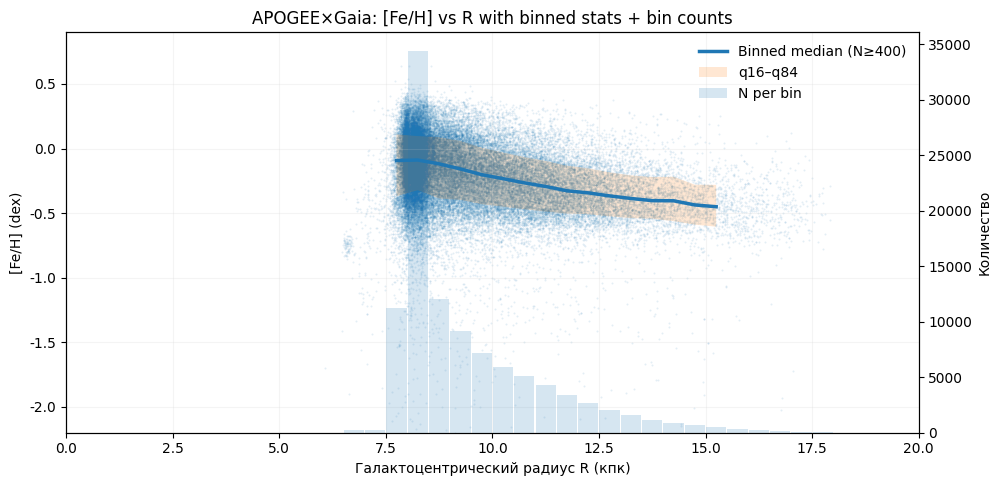

In [6]:
# =========================================================
# [ACAP_002|FIG_ISM] APOGEE×Gaia: [Fe/H] vs R_gal with binned stats + bin counts
#
# Input:
#   - apogee_gaia_fehr_R.csv  (produced in [ACAP_002|DATA_ISM])
#
# Output:
#   - Figure saved via save_fig0(...)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lulab.i18n.plot_text import L, T

# ----------------------------
# Load standardized ISM table
# ----------------------------
ism_path = DATA_PROCESSED_DIR / "apogee_gaia_fehr_R.csv"
df = pd.read_csv(ism_path)

need = {"R_gal", "feh"}
missing = need - set(df.columns)
if missing:
    raise RuntimeError(
        f"Missing columns {missing} in {ism_path.name}. "
        f"Found columns: {list(df.columns)}"
    )

df = df[["R_gal", "feh"]].copy()
df["R_gal"] = pd.to_numeric(df["R_gal"], errors="coerce")
df["feh"]   = pd.to_numeric(df["feh"], errors="coerce")
df = df.dropna(subset=["R_gal", "feh"])

# presentation-safe limits (keep wide; tune if needed)
df = df[(df["R_gal"] > 0) & (df["R_gal"] < 30) & (df["feh"] > -3) & (df["feh"] < 1.5)].copy()

print("Loaded ISM table:", ism_path)
print("Rows for diagnostics:", len(df))

# ----------------------------
# Binning config
# ----------------------------
R_MIN, R_MAX = 0.0, 20.0
BIN_W = 0.5            # kpc
MIN_N = 400            # show median/band only if bin has >= MIN_N

bins = np.arange(R_MIN, R_MAX + BIN_W, BIN_W)
cent = 0.5 * (bins[:-1] + bins[1:])

# ----------------------------
# Compute binned stats
# ----------------------------
idx = np.digitize(df["R_gal"].to_numpy(), bins) - 1
valid = (idx >= 0) & (idx < len(cent))
idx = idx[valid]
feh = df["feh"].to_numpy()[valid]

N   = np.bincount(idx, minlength=len(cent)).astype(int)

med = np.full(len(cent), np.nan, dtype=float)
q16 = np.full(len(cent), np.nan, dtype=float)
q84 = np.full(len(cent), np.nan, dtype=float)

for i in range(len(cent)):
    if N[i] == 0:
        continue
    vals = feh[idx == i]
    med[i] = np.nanmedian(vals)
    q16[i] = np.nanpercentile(vals, 16)
    q84[i] = np.nanpercentile(vals, 84)

mask = N >= MIN_N

print("Bins:", len(cent))
print(f"Bins with N >= {MIN_N}:", int(mask.sum()))
if len(N) > 0:
    print("Min/Max N in bins:", int(N.min()), int(N.max()))

# ----------------------------
# Plot: median + quantiles + N bars on twin axis
# ----------------------------
fig, ax = plt.subplots(figsize=(11, 5.2))

# scatter subsample for context
samp = df.sample(min(len(df), 60000), random_state=1) if len(df) > 0 else df
ax.scatter(samp["R_gal"], samp["feh"], s=2, alpha=0.12, linewidths=0)

# binned median & band
ax.plot(
    cent[mask], med[mask],
    linewidth=2.5,
    label=f"{L('binned_median')} (N≥{MIN_N})" if L("binned_median") != "binned_median" else f"Binned median (N≥{MIN_N})"
)
ax.fill_between(
    cent[mask], q16[mask], q84[mask],
    alpha=0.18,
    label=L("q16_q84") if L("q16_q84") != "q16_q84" else "q16–q84"
)

ax.set_xlim(R_MIN, R_MAX)
ax.set_ylim(-2.2, 0.9)
ax.set_xlabel(L("R_gal"))   # "Galactocentric radius R (kpc)" / RU version in YAML
ax.set_ylabel(L("feh"))     # "[Fe/H] (dex)" (same in both)
ax.grid(alpha=0.2)

# twin axis for counts
ax2 = ax.twinx()
ax2.bar(cent, N, width=BIN_W * 0.95, alpha=0.18, label=L("n_per_bin") if L("n_per_bin") != "n_per_bin" else "N per bin")
ax2.set_ylabel(L("count"))  # "Count"/"Количество" (close enough for N-axis)
ax2.set_ylim(0, max(N.max() * 1.05, 1))

# combined legend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1 + h2, l1 + l2, frameon=False, loc="upper right")

ax.set_title(T("figure_ism_feh_vs_Rgal") if T("figure_ism_feh_vs_Rgal") != "figure_ism_feh_vs_Rgal"
             else "APOGEE×Gaia: [Fe/H] vs R with binned stats + bin counts")

# save
save_fig0("Figure_2", fig=fig)
plt.show()

*Рис. 2. «Современный радиальный градиент металличности, восстановленный по звёздам APOGEE×Gaia, является пологим  
($\sim\;-0.05\;\mathrm{dex}\;\mathrm{kpc}^{-1}$), что согласуется с сильным радиальным перемешиванием в Галактическом диске.*

*Хемо-динамические реконструкции и молодые трассеры указывают на то, что
исходный градиент металличности межзвёздной среды при рождении звёзд был
значительно более крутым  
($\sim -0.2$–$-0.3\;\mathrm{dex\;kpc}^{-1}$), что свидетельствует о существенном
уплощении градиента на протяжении галактической эволюции».*

### 2.3. Что показано на рисунке

Рисунок объединяет три взаимодополняющих слоя информации:

1. **Облако точек (фон)**  
   Большая подвыборка отдельных звёзд, показывающая полный разброс значений [Fe/H] на каждом галактоцентрическом радиусе.  
   Это наглядно демонстрирует:
   - внутренний астрофизический разброс,
   - эффекты отбора,
   - смешение звёздных популяций.

2. **Бинированная статистика (передний план)**  
   - медианное значение [Fe/H] в радиальных бинах шириной ΔR = 0.5 кпк;  
   - заштрихованный интервал q16–q84 (приблизительный аналог 1σ);  
   - отображаются только бины с достаточной статистикой (N ≥ 400), что исключает шумовые области.

3. **Число звёзд в бинах (вторая ось)**  
   Гистограмма количества звёзд в каждом радиальном бине, показывающая,
   где данные являются статистически надёжными.

---

### 2.4. Что мы узнаём из этого графика

1. **Чёткий отрицательный радиальный градиент металличности**  
   Медианное значение [Fe/H] систематически убывает с ростом галактоцентрического радиуса, что согласуется с классическими представлениями о химической эволюции диска.

2. **Максимальный статистический вес в окрестности Солнца**  
   Число звёзд достигает максимума при R ≈ 8 кпк, что отражает как стратегию наблюдений, так и геометрию солнечного окружения.

3. **Рост разброса на больших радиусах**  
   Во внешнем диске наблюдается более широкий разброс [Fe/H], вероятно обусловленный сочетанием:
   - радиальной миграции,
   - более низкой эффективности звездообразования,
   - усиленных эффектов отбора.

4. **Устойчивость к выбросам**  
   Использование медиан и квантилей вместо средних значений делает выявленный тренд устойчивым даже при наличии металлобедных хвостов распределения и наблюдательных артефактов.

Этот график формирует наблюдательный фундамент для интерпретации радиусов рождения звёзд и напрямую мотивирует моделирование, вводимое в следующих частях практикума.

### 2.5. Заключение для Части II  
*(От наблюдательных трендов к эволюции Галактики)*

Во второй части этого практикума мы расширили чисто наблюдательную картину
Галактического диска, включив в анализ возраста звёзд, полученные на основе
астросейсмически откалиброванных данных APOGEE (Boulet et al. 2024).

Объединив:
- возраста звёзд,
- металличности,
- и их галактическое положение,

мы смогли выйти за рамки статических распределений и исследовать временное
измерение химической эволюции Галактики.

Ключевые результаты этой части:

- Связь «возраст–металличность» демонстрирует большой внутренний разброс,
  что подтверждает: металличность сама по себе является плохим индикатором
  возраста звёзд диска.
- Несмотря на сильный разброс, при статистическом анализе и бинировании
  данных проявляются устойчивые систематические тренды.
- Наблюдаемый радиальный градиент металличности согласуется со сценарием,
  в котором звёзды формируются на разных галактоцентрических радиусах,
  а затем мигрируют.
- Современная металличностная структура диска не может быть объяснена
  без учёта временной эволюции и перераспределения звёзд.

Эта часть практикума показывает, что **возраста звёзд являются критически
важным недостающим звеном** между современной структурой Галактики и её
историей формирования.

Именно они позволяют связать наблюдаемые химические закономерности
с физическими процессами, такими как рост диска «изнутри наружу»
и радиальная миграция звёзд.

### Итоговое заключение — Практикум 2  

*(Наблюдательные основы галактической химической эволюции)*

В Практикуме 2 мы построили полный, основанный на наблюдениях пайплайн
для изучения химической структуры и эволюции Галактического диска.

Начиная с крупных спектроскопических и астрометрических обзоров
(`APOGEE` и `Gaia`), мы показали, как современная галактическая археология
переходит от «сырых» каталогов к физической интерпретации.

В обеих частях практикума было продемонстрировано, что:

- Диск Млечного Пути обладает чётким и статистически устойчивым
  радиальным градиентом металличности.
- Этот градиент напрямую наблюдаем и не зависит от модельных предположений.
- Возраста звёзд показывают, что металличностная структура диска
  не является статичной, а эволюционирует со временем.
- Совместный анализ возрастов, металличностей и пространственного положения
  звёзд даёт убедительные свидетельства радиальной миграции и формирования
  диска по сценарию «изнутри наружу».

Не менее важным является и методологический аспект, на котором был сделан
особый акцент:

- Все продукты обработки данных воспроизводимы и сохраняются
  в виде промежуточных CSV-файлов.
- Каждый этап анализа может быть повторён независимо от внешних сервисов.
- Выбор визуализации и статистического бинирования существенно влияет
  на получаемые научные выводы.

Таким образом, Практикум 2 закладывает как наблюдательную, так и
методологическую основу для следующего этапа анализа, на котором
физически мотивированные модели галактической химической эволюции
могут быть напрямую сопоставлены с данными.

В последующих практикумах эти наблюдательные ограничения будут использованы,
чтобы:
- реконструировать галактоцентрические радиусы рождения звёзд,
- проверить конкурирующие эволюционные модели,
- и в конечном итоге связать современную структуру Галактики
  с историей формирования Млечного Пути.

## Литература

[1] *“Where in the Milky Way do exoplanets preferentially form?”* (Teixeira, Adibekyan, Bossini et al., 2024) [https://arxiv.org/pdf/2501.11660](https://arxiv.org/pdf/2501.11660)

[2] *"Exploring the Sun’s birth radius and the distribution of planet building blocks in the Milky Way galaxy: a multizone Galactic chemical evolution approach"* (Junichi Baba, Takayuki R. Saitoh and Takuji Tsujimoto, 2023) [https://academic.oup.com/mnras/article/526/4/6088/7324836](https://academic.oup.com/mnras/article/526/4/6088/7324836?login=false)

[3] *"A catalogue of asteroseismically calibrated ages for APOGEE DR17: The predictions of a CatBoost machine learning model based on the [Mg/Ce] chemical clock and other stellar parameters."* (Boulet, T. (2024)) Astronomy & Astrophysics, 685, A66. [https://doi.org/10.1051/0004-6361/202348031](https://doi.org/10.1051/0004-6361/202348031)
